C:\Users\samir\AppData\Local\Temp\ipykernel_15328\1388180043.py:18: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  matrix = nx.adjacency_matrix(network).todense()


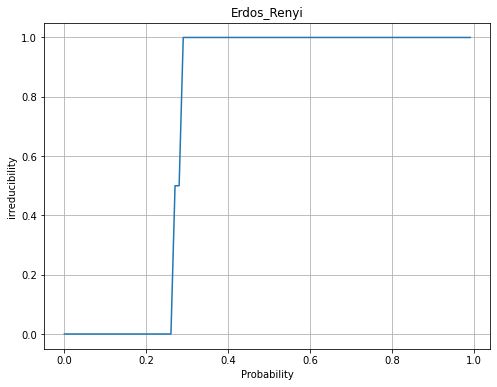

In [8]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt


def simulation(network):
    p = 0
    my_list = []
    my_reduced_list = []

    while p < 1:
        is_reduced = 0
        for j in nx.edges(network):
            if random.random() < p:
                network.remove_edge(j[0], j[1])

        matrix = nx.adjacency_matrix(network).todense()
        if np.allclose(matrix, np.tril(matrix)) \
                or np.allclose(matrix, np.triu(matrix)) \
                or np.allclose(matrix,np.diag(matrix)):
            is_reduced += 1

        my_reduced_list.append(is_reduced)
        my_list.append(p)
        p += 0.01

    return [my_list, my_reduced_list]


def plot(p_list, is_reduced_list_p, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(p_list, is_reduced_list_p)
    plt.title(title)
    plt.ylabel('irreducibility')
    plt.xlabel('Probability')
    ax.grid()
    plt.savefig('./phase1/1/' + title + '.png')
    plt.show()


number_of_nodes = 20
p_graph = 0.2
deg = 10
number_of_simulations = 1000


def erdos_renyi_test(number_of_node, probability_of_edge, number_of_simulation):
    erdos_network = nx.erdos_renyi_graph(number_of_node, probability_of_edge)
    [p_list, is_reduced_list_sum] = simulation(erdos_network)
    for i in range(1, number_of_simulation):
        erdos_network = nx.erdos_renyi_graph(number_of_node, probability_of_edge)
        [p_list, is_reduced_list] = simulation(erdos_network)
        is_reduced_list_sum = np.add(is_reduced_list, is_reduced_list_sum)
    plot(p_list,(is_reduced_list_sum / number_of_simulation), 'Erdos_Renyi')


erdos_renyi_test(number_of_nodes, p_graph, 2)


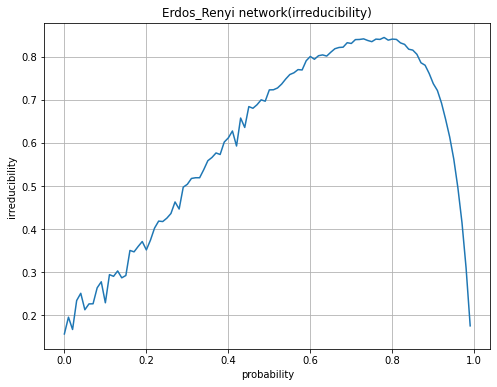

In [16]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

number_of_nodes = 20
p_graph = 0.2
deg = 10
number_of_simulations = 100

def calculation_eq3(nos):
    # print("calculation")
    p = 0
    p_list = []
    res_list = []

    while p < 1:
        prob_e = 0
        p_list.append(p)
        for i in range(nos):
            network = nx.erdos_renyi_graph(number_of_nodes, p_graph)
            prob_e += eq3(network, p)

        res_list.append(1 - (prob_e / nos))
        p += 0.01
    # while_end

    return [p_list, res_list]


def eq3(network, p):
    # print('eq3 ', p)
    p_ki = 0
    for i in network.degree():
        p_ki += p ** i[1]

    prob = (p - 1) * p_ki
    prob_e = np.exp(prob)

    # print(prob_e)
    return prob_e


def plot_irreducibility(my_list, out_list, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(my_list, out_list)
    plt.title(title + ' network(irreducibility)')
    plt.ylabel('irreducibility')
    plt.xlabel('probability')
    ax.grid()
    plt.savefig('phase1/2/3/' + title + '.png')
    plt.show()

[e_list, eq3_list] = calculation_eq3(number_of_simulations)
plot_irreducibility(e_list, eq3_list, 'Erdos_Renyi')

In [6]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

number_of_nodes = 20
p_graph = 0.4
deg = 10
number_of_simulations = 100

def calculation_eq6(nos):
    # print("calculation")
    p = 0
    p_list = []
    res_list = []

    while p < 1:
        out_g = 0
        p_list.append(p)
        for i in range(nos):
            network = nx.erdos_renyi_graph(number_of_nodes, p)
            out_g += eq6(network, p)
        res_list.append(out_g / nos)
        p += 0.01
        # while_end

    return [p_list, res_list]


def eq6(network, p):
    print('eq6 ', p)
    out_g = 0

    if not nx.is_connected(network):
        return 0

    non = network.number_of_nodes()
    for j in range(0, non + 1):
        cut = 0
        for n in list(nx.all_node_cuts(network)):
            if len(n) == j:
                cut += 1

        out_g += cut * (p ** j) * ((1 - p) ** (non - j))

    # print(out_g)
    return 1 - out_g


def plot_reliability(my_list, out_list, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(my_list, out_list)
    plt.title(title + ' network(reliability)')
    plt.ylabel('reliability')
    plt.xlabel('probability')
    ax.grid()
    plt.savefig('phase1/2/6/' + title + '.png')
    plt.show()

[e_list, eq6_list] = calculation_eq6(1)
plot_reliability(e_list, eq6_list, 'Erdos_Renyi')

eq6  0
eq6  0.01
eq6  0.02
eq6  0.03
eq6  0.04
eq6  0.05
eq6  0.060000000000000005
eq6  0.07
eq6  0.08
eq6  0.09
eq6  0.09999999999999999
eq6  0.10999999999999999
eq6  0.11999999999999998
eq6  0.12999999999999998
eq6  0.13999999999999999
eq6  0.15
eq6  0.16
eq6  0.17
eq6  0.18000000000000002
eq6  0.19000000000000003
eq6  0.20000000000000004
eq6  0.21000000000000005
eq6  0.22000000000000006
eq6  0.23000000000000007
eq6  0.24000000000000007
eq6  0.25000000000000006
eq6  0.26000000000000006
eq6  0.2700000000000001
eq6  0.2800000000000001
eq6  0.2900000000000001
eq6  0.3000000000000001
eq6  0.3100000000000001
eq6  0.3200000000000001
eq6  0.3300000000000001
eq6  0.34000000000000014
eq6  0.35000000000000014
eq6  0.36000000000000015
eq6  0.37000000000000016
eq6  0.38000000000000017
eq6  0.3900000000000002
eq6  0.4000000000000002
eq6  0.4100000000000002
eq6  0.4200000000000002
eq6  0.4300000000000002
eq6  0.4400000000000002
eq6  0.45000000000000023
eq6  0.46000000000000024
eq6  0.4700000000000

KeyboardInterrupt: 